In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Data/Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2897,8234-GSZYK,Male,0,No,No,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.45,1110.05,No
115,3071-VBYPO,Male,0,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,89.85,248.4,No
4619,4290-BSXUX,Male,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),79.65,251.75,Yes
2128,1163-ONYEY,Male,0,Yes,Yes,41,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),74.55,3023.55,No
60,0434-CSFON,Female,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,4707.1,No


In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.drop('customerID', axis=1, inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges)
df.dtypes

ValueError: Unable to parse string " " at position 488

In [8]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488].TotalCharges

' '

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df2 = df1.copy()

In [16]:
df2.TotalCharges = pd.to_numeric(df2.TotalCharges)

In [17]:
df2.TotalCharges.dtype

dtype('float64')

In [18]:
tenure_churn_no = df2[df2.Churn=="No"].tenure
tenure_churn_yes = df2[df2.Churn=="Yes"].tenure

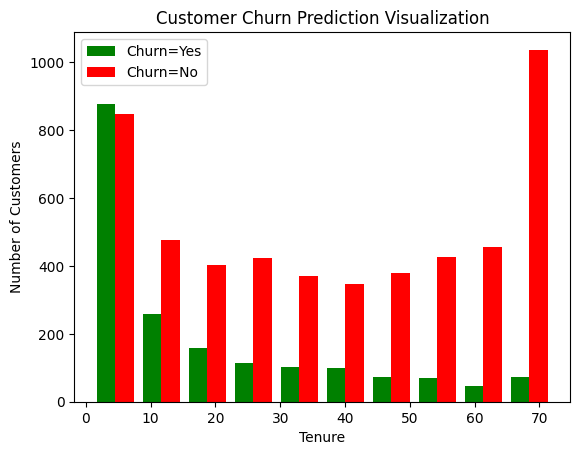

In [19]:
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

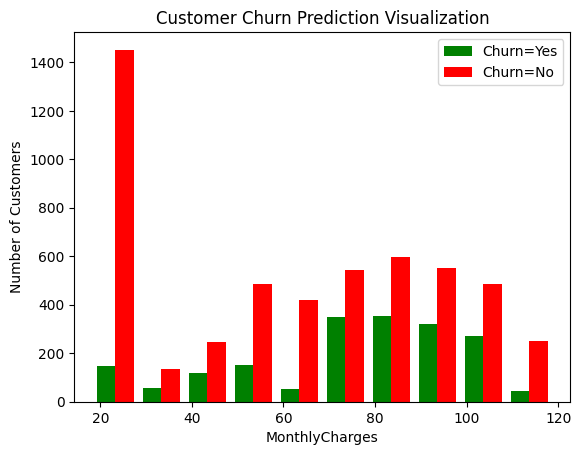

In [20]:
mc_churn_no = df2[df2.Churn=="No"].MonthlyCharges
mc_churn_yes = df2[df2.Churn=="Yes"].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

In [21]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f"{column}  :  {df[column].unique()}")

In [22]:
print_unique_col_values(df2)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [23]:
df3 = df2.copy()

In [24]:
df3 = df3.replace('No internet service', 'No')
df3 = df3.replace('No phone service', 'No')

In [25]:
print_unique_col_values(df3)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [26]:
df3 = df3.replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)

C:\Users\niloy\AppData\Local\Temp\ipykernel_20952\3080643801.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3 = df3.replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


In [27]:
print_unique_col_values(df3)

gender  :  ['Female' 'Male']
InternetService  :  ['DSL' 'Fiber optic' 0]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [28]:
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [36]:
for col in df3:
    print(f"{col} : {df3[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [41]:
df4 = df3.copy()

In [42]:
df4['gender'] = df4['gender'].replace({'Female':0, 'Male':1})

C:\Users\niloy\AppData\Local\Temp\ipykernel_20952\1642938315.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['gender'] = df4['gender'].replace({'Female':0, 'Male':1})


In [45]:
df4['gender'].unique()

array([0, 1])

## One Hot Encoding

In [48]:
df5 = pd.get_dummies(data=df4, columns=['InternetService', 'Contract', 'PaymentMethod'])
df5.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
df5.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
641,0,0,1,1,43,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3634,1,1,0,0,72,1,1,1,1,1,...,False,False,True,False,False,True,True,False,False,False
5519,1,0,1,0,1,1,0,1,0,1,...,False,True,False,True,False,False,False,False,False,True
5901,1,0,1,1,49,1,1,0,0,0,...,False,False,True,True,False,False,False,False,True,False
4919,1,0,1,0,70,0,0,1,0,1,...,False,True,False,False,False,True,False,True,False,False


In [53]:
df5.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                             bool
InternetService_DSL                           bool
InternetService_Fiber optic    

## Scaling

In [54]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df5[columns_to_scale] = scaler.fit_transform(df5[columns_to_scale])

In [56]:
df5.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3595,0,1,0,0,0.014085,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
6964,0,0,1,0,0.676056,0,0,0,1,0,...,False,True,False,False,True,False,False,True,False,False
5707,0,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
46,1,0,0,0,0.014085,1,0,0,1,0,...,False,True,False,True,False,False,False,False,False,True
5675,1,0,0,0,0.028169,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


## Model training

In [57]:
X = df5.drop('Churn', axis='columns')
y = df5['Churn']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [81]:
X_train.shape

(5625, 26)

In [82]:
X_test.shape

(1407, 26)

In [96]:
model = keras.Sequential([
    keras.Input(shape=(26,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8298 - loss: 0.3658
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8361 - loss: 0.3617
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8282 - loss: 0.3723
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8225 - loss: 0.3735
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8352 - loss: 0.3746
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8377 - loss: 0.3578
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8353 - loss: 0.3593
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8345 - loss: 0.3658
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8341 - loss: 0.3594
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8358 - loss: 0.3639
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8318 - loss: 0.3640
Epoch 12/100
176/17

In [103]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7821 - loss: 0.4698


[0.4732075333595276, 0.7818052768707275]

In [104]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


array([[0.37106544],
       [0.8913584 ],
       [0.24256046],
       [0.28530338],
       [0.05928983]], dtype=float32)

In [116]:
y_test[:10]

6550    1
4353    1
2877    1
2555    0
350     0
5104    0
1654    0
3220    0
3461    0
4983    1
Name: Churn, dtype: int64

In [107]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [117]:
y_pred[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [119]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1030
           1       0.61      0.50      0.55       377

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(70.72222222222221, 0.5, 'Truth')

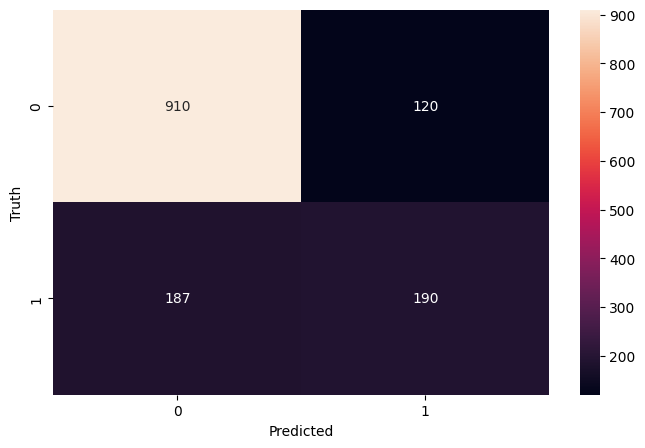

In [126]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## <span style="color:red">Accuracy</span>
#### Accuracy = True_Prediction / Total_Prediction

In [128]:
accuracy = round((910+190)/(910+120+187+190),2)
accuracy

0.78

## <span style="color:red">Precision for class 0
#### Precision = True_Positive / (True_positive + False_positive)

In [130]:
precision0 = round(910 / (910+187),2)
precision0

0.83

## <span style="color:red">Precision for class 1
#### Precision = True_Positive / (True_positive + False_positive)

In [131]:
precision1 = round(190 / (190+120),2)
precision1

0.61

## <span style="color:red">Recall for class 0
#### Recall = True_Positives / (True_positives + False_negetive)

In [132]:
Recall0 = round(910 / (910 + 120),2)
Recall0

0.88

## <span style="color:red">Recall for class 1
#### Recall = True_Positives / (True_positives + False_negetive)

In [133]:
Recall1 = round(190 / (190 + 187),2)
Recall1

0.5